In [53]:
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

In [109]:
test_embs = np.load("embs/test_embs.npy")
test_labs = np.load("embs/test_y.npy")

val_embs = np.load("embs/val_embs.npy")
val_labs = np.load("embs/val_y.npy")

train_embs = np.load("embs/train_embs.npy")
train_labs = np.load("embs/train_y.npy")

In [14]:
def project_embs(X):
    pca = PCA(n_components=2)
    projected = pca.fit_transform(X)
    
    return projected

In [ ]:
test_X = project_embs(test_embs)

array([[-14.222012  ,  -2.6952221 ],
       [  1.7698421 ,  -2.3100665 ],
       [ -2.9910126 ,   0.05483341],
       ...,
       [  5.5009503 ,  -2.8618598 ],
       [  5.1153746 ,  -4.550085  ],
       [  2.6377182 ,  -1.278195  ]], shape=(42166, 2), dtype=float32)

In [ ]:
test_labs = [y.item() for y in test_labs]

In [31]:
len(test_X), len(test_labs)

(42166, 42166)

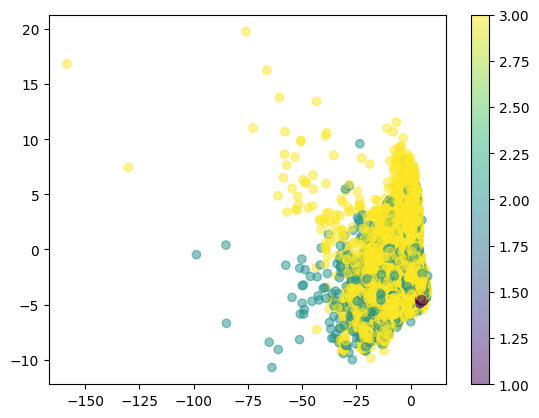

In [51]:
plt.scatter(test_X[:,0], test_X[:, 1], c=test_labs, alpha=.5)
plt.colorbar()

In [97]:
kpca = KernelPCA(n_components=2, kernel="linear", n_jobs=-1)
x_kpca = kpca.fit_transform(test_embs)

In [95]:
pos_neg_labels = np.array([i for i in test_labs if i == 1 or i == 2])

524


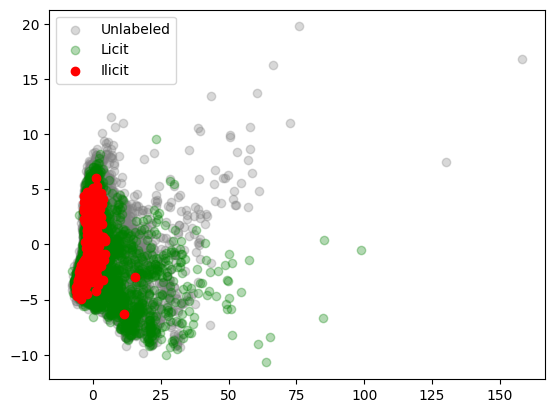

In [102]:
pos_indices = np.where((test_labs == 1))[0]
neg_indices = np.where((test_labs == 2))[0]
unknown_indices = np.where((test_labs == 3))[0]

plt.scatter(x_kpca[unknown_indices, 0], x_kpca[unknown_indices, 1], c="gray", alpha=.3, label="Unlabeled")
plt.scatter(x_kpca[neg_indices, 0], x_kpca[neg_indices, 1], c="green", alpha=.3, label="Licit")
plt.scatter(x_kpca[pos_indices, 0], x_kpca[pos_indices, 1], c="red", alpha=1, label="Ilicit")
plt.legend()
print(len(pos_indices))

C:\Users\sebas\AppData\Local\Temp\ipykernel_26088\313824419.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


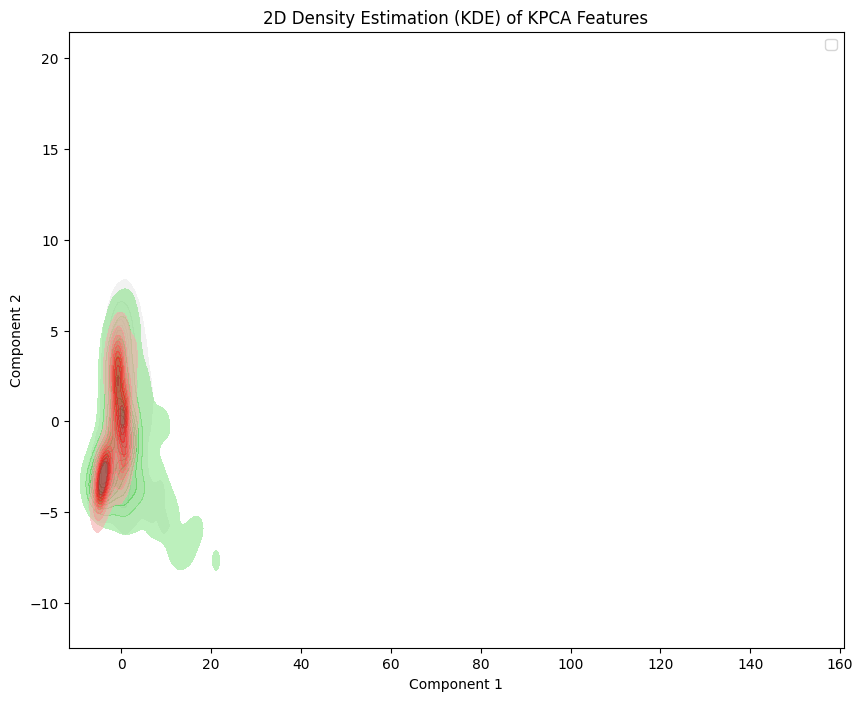

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(10, 8))

# 1. Plot Unlabeled (Gray) - using a light contour or low alpha to keep it as background
sns.kdeplot(
    x=x_kpca[unknown_indices, 0], y=x_kpca[unknown_indices, 1],
    fill=True, thresh=0.05, alpha=0.2, color="gray", label="Unlabeled"
)

# 2. Plot Licit (Green) - Density contours
sns.kdeplot(
    x=x_kpca[neg_indices, 0], y=x_kpca[neg_indices, 1],
    fill=True, thresh=0.05, alpha=0.4, color="green", label="Licit"
)

# 3. Plot Ilicit (Red) - Higher alpha/levels to make it stand out
sns.kdeplot(
    x=x_kpca[pos_indices, 0], y=x_kpca[pos_indices, 1],
    fill=True, thresh=0.05, alpha=0.6, color="red", label="Ilicit"
)

plt.title("2D Density Estimation (KDE) of KPCA Features")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

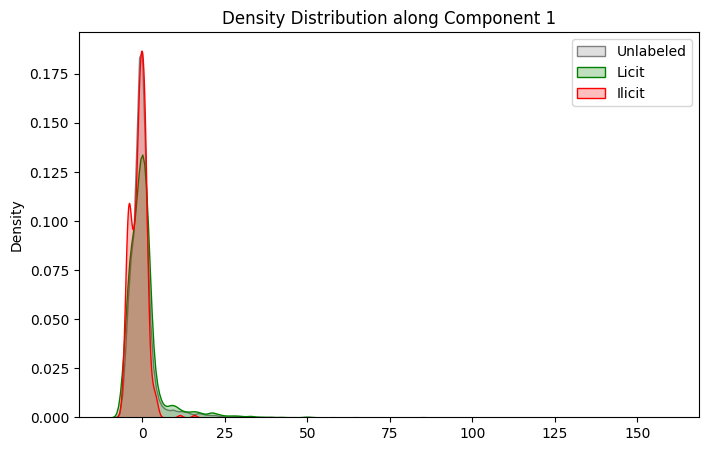

In [108]:
plt.figure(figsize=(8, 5))
sns.kdeplot(x_kpca[unknown_indices, 0], color="gray", label="Unlabeled", fill=True)
sns.kdeplot(x_kpca[neg_indices, 0], color="green", label="Licit", fill=True)
sns.kdeplot(x_kpca[pos_indices, 0], color="red", label="Ilicit", fill=True)
plt.title("Density Distribution along Component 1")
plt.legend()
plt.show()

524


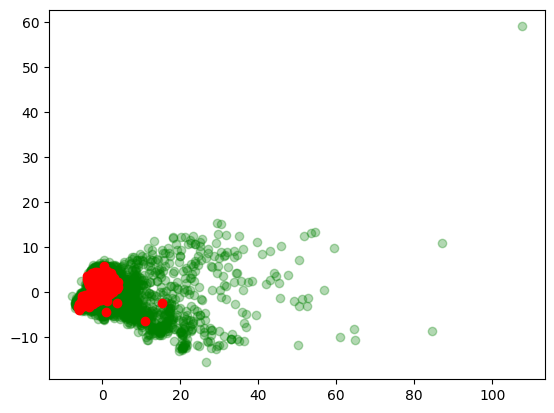

In [96]:
pos_indices = np.where((pos_neg_labels == 1))[0]
neg_indices = np.where((pos_neg_labels == 2))[0]

plt.scatter(x_kpca[neg_indices, 0], x_kpca[neg_indices, 1], c="green", alpha=.3)
plt.scatter(x_kpca[pos_indices, 0], x_kpca[pos_indices, 1], c="red", alpha=1)

print(len(pos_indices))

In [72]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=.01)

clusters = db.fit_predict(x_kpca)

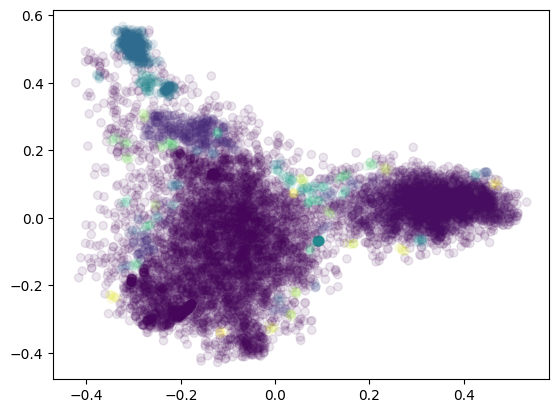

In [73]:
plt.scatter(x_kpca[:,0], x_kpca[:, 1], c=clusters, alpha=.1)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(test_X)

In [48]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(test_labs, clusters))
print("Silhouette:", silhouette_score(test_X, clusters))


ARI: 0.03612623354311737
Silhouette: 0.4639706313610077


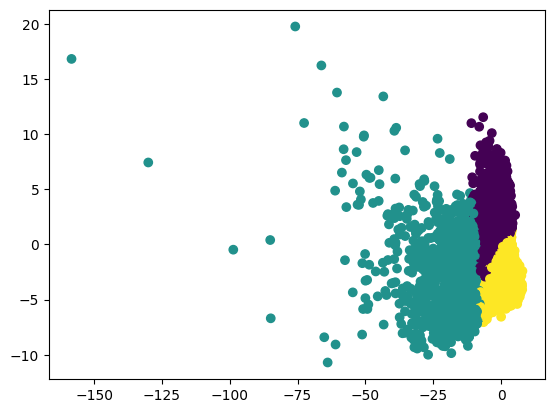

In [50]:
plt.scatter(test_X[:,0], test_X[:, 1], c=clusters)


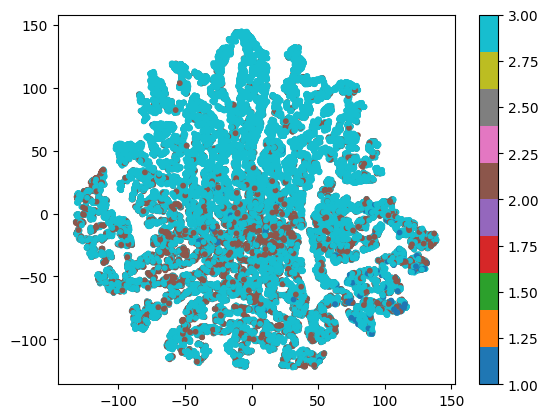

In [ ]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(test_X)

In [40]:
test_labs = np.array(test_labs)
pos_neg_indices = np.where((test_labs == 1) | (test_labs == 2))[0]
pos_neg_indices

array([    0,     2,     5, ..., 42158, 42160, 42164], shape=(9973,))

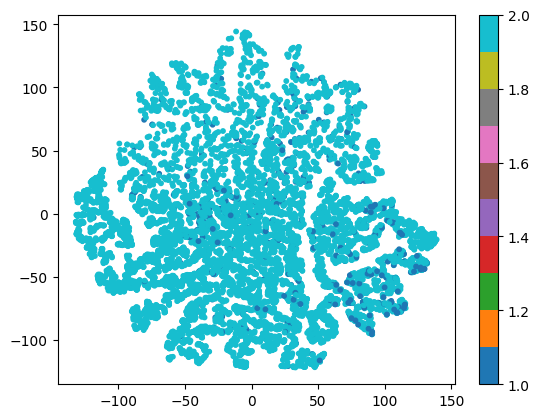

In [41]:

plt.scatter(X_tsne[pos_neg_indices,0], X_tsne[pos_neg_indices,1], c=test_labs[pos_neg_indices], cmap='tab10', s=10)
plt.colorbar()
plt.show()


In [42]:
from turtle import pos


X_tsne = TSNE(n_components=2, random_state=42).fit_transform(test_X[pos_neg_indices])


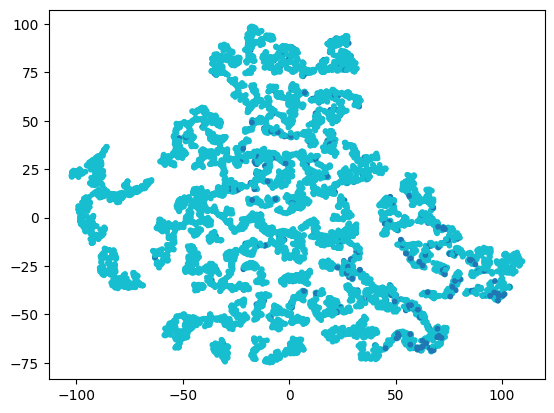

In [44]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=test_labs[pos_neg_indices], cmap='tab10', s=10)


In [45]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_tsne, test_labs[pos_neg_indices])
print("Silhouette score:", score)


Silhouette score: -0.015457279980182648
